In [1]:
import pandas as pd
import plotly.express as px
import os
import datetime
from dateutil.relativedelta import relativedelta
import calendar

import plotly.io as pio
#https://www.geeksforgeeks.org/python-plotly-exporting-to-static-images/

In [2]:
is_py=False

In [3]:
# 31Dec21 - 22May22  (last day of prev month - current date)
# Export data from amibroker as format  D:\AB_DB\AB-Template & Explore\TopN_ROC_XPeriod.apx  
# Ticker,Date/Time,open,high,low,close,name,volume
# AVAX,31/12/2021 00:00:00,101.75,111.99,100.13,109.43,,2472910.50
# AVAX,1/1/2022 00:00:00,109.43,114.50,108.42,114.13,,1211128.00

#Amibroker script 
# Filter=1; 
# AddColumn(O,"open"); 
# AddColumn(H,"high"); 
# AddColumn(L,"low"); 
# AddColumn(C,"close"); 
# AddTextColumn(FullName(),"name");
# AddColumn(V,"volume"); 



In [61]:
# root_path=r'D:\JupyterCode\MyQuantFinProject\Data\ThaiFund\TH_All'
root_path=r'D:\JupyterCode\MyQuantFinProject\Report\SET-THAI'
result_path='D:\JupyterCode\MyQuantFinProject\Report\SET-THAI'

# file_name='China_Nov20-Mar21.csv'
file_name='15Big-SET_1H22.csv'
title=file_name.replace('.csv','')
print(file_name," : ",title)

#title=''

# since the end calculate since x 
to_month_str='2022-06'

# Whick time frame   and look past in the past x month
timeframe='M'
past_month=6

# timeframe='W'
# past_week=8

required_fullname=False

today=datetime.datetime.today()
print(today)




15Big-SET_1H22.csv  :  15Big-SET_1H22
2022-06-18 06:01:37.264473


#Enter data

if is_py:
    print("Enter Timeframe (m or w)")
    timeframe = input("Enter TimeFrame : ")
    timeframe=timeframe.upper()

    print("Enter To Date asY-m (2022-03)")
    end_param = input("Enter end : ")



    try:
        start_dt=datetime.strptime(start, "%Y.%m.%d")
        end_dt=datetime.strptime(end,"%Y.%m.%d")
        if start_dt>=end_dt:
           raise Exception(f"Error : {start_dt} can't be greater or equal to {end_dt}")
    except Exception as ex:
        raise ex



    print(f"Do you want to retrive data from {start_dt} to {end_dt} ?")
    press_y=input(f"Press y=True and n=False : ") 
    if press_y.lower()=='y':
     ok=True
    else:
     exit()
else: 
    start='2017.01.01'
    end= today_now.strftime("%Y.%m.%d")
    
print(f"{start} - {end}")

In [62]:
print(to_month_str)
split_end_to=to_month_str.split('-')
print(split_end_to)
if  len(split_end_to)==2:
 range_month=calendar.monthrange(int(split_end_to[0]), int(split_end_to[1]))
 print(range_month)
else:
 raise Exception("Need format  '2021-12' ")   
    



2022-06
['2022', '06']
(2, 30)


In [63]:
to_month_firstDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,1 )
to_month_lastDate=datetime.datetime( int(split_end_to[0]), int(split_end_to[1]) ,range_month[1] )

print(to_month_firstDate)
print(to_month_lastDate)

2022-06-01 00:00:00
2022-06-30 00:00:00


In [64]:
if timeframe=='M':
    from_month=to_month_firstDate  + relativedelta(months=-past_month)
    from_month_str=from_month.strftime('%Y-%m')
    
    to_month_str=to_month_firstDate.strftime('%Y-%m')
    
    
elif timeframe=='W':
    if today<to_month_lastDate:
      from_month=today  + relativedelta(weeks=-(past_week+1))
      to_month_str=today.strftime('%Y-%m-%d')
    else: 
      from_month=to_month_lastDate  + relativedelta(weeks=-past_week)  
      to_month_str=to_month_lastDate.strftime('%Y-%m-%d')
    
    from_month_str=from_month.strftime('%Y-%m-%d')
     

print(f"look back in the  { past_month }+1(Including current month)  {timeframe } : {from_month_str} - {to_month_str}")   

look back in the  6+1(Including current month)  M : 2021-12 - 2022-06


In [65]:
# create directory
folder_report=f'{title}_{timeframe }_{from_month_str}_{to_month_str}'
report_path=result_path+"\\"+folder_report

try:  
 if not os.path.exists(report_path):
     os.mkdir(report_path) 
     print(report_path)   
     
except OSError as error:  
    raise error

D:\JupyterCode\MyQuantFinProject\Report\SET-THAI\15Big-SET_1H22_M_2021-12_2022-06


In [66]:
dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
# dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col='Date/Time')
dfAll.index.rename('datetime',inplace=True)
print(dfAll.info())

print(dfAll.head())
print(dfAll.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2004 entries, 2021-11-25 to 2022-06-17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  2004 non-null   object 
 1   open    2004 non-null   float64
 2   high    2004 non-null   float64
 3   low     2004 non-null   float64
 4   close   2004 non-null   float64
 5   volume  2004 non-null   float64
dtypes: float64(5), object(1)
memory usage: 109.6+ KB
None
            Ticker   open   high    low  close      volume
datetime                                                  
2021-11-25  ADVANC  214.0  215.0  209.0  210.0   6643100.0
2021-11-26  ADVANC  209.0  210.0  205.0  205.0   8125000.0
2021-11-29  ADVANC  207.0  214.0  206.0  211.0  10640100.0
2021-11-30  ADVANC  212.0  215.0  205.0  206.0  17453400.0
2021-12-01  ADVANC  209.0  211.0  204.0  211.0  11582400.0
           Ticker   open   high    low  close      volume
datetime                                          

In [67]:


df=dfAll.loc[from_month_str:to_month_str,:]

df.rename(columns={'Ticker':'symbol'},inplace=True)


if required_fullname==True: 
 df=df[['symbol','name','close']]   
 df['symbol'] = df.apply( lambda x: f'{x["symbol"]} {x["name"]}'  , axis=1) 
else:
 df=df[['symbol','close']]   
    

print(df.info())

if  df.empty:
    print("No data according to your timeframe.")
    print("The belows is last record.")
    print( dfAll.iloc[len(dfAll)-1,:])
    exit()
    
else:   
    dfAll=None
    
print(df.head())
print(df.tail())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1944 entries, 2021-12-01 to 2022-06-17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  1944 non-null   object 
 1   close   1944 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.6+ KB
None
            symbol  close
datetime                 
2021-12-01  ADVANC  211.0
2021-12-02  ADVANC  212.0
2021-12-03  ADVANC  212.0
2021-12-07  ADVANC  211.0
2021-12-08  ADVANC  220.0
           symbol  close
datetime                
2022-06-13    TOP  53.50
2022-06-14    TOP  54.50
2022-06-15    TOP  54.75
2022-06-16    TOP  53.25
2022-06-17    TOP  49.50


In [68]:
last_record=df.index[len(df)-1]
last_record_str=last_record.strftime('%d-%m-%Y')
print("Last Day : ",last_record_str)


list_symbol=df['symbol'].unique().tolist()
print(list_symbol)

# list_symbol=['AVAX','ETH','SOL']

df_Monthly_Price=pd.DataFrame(columns=['symbol','month-year','pct_change'])

Last Day :  17-06-2022
['ADVANC', 'AOT', 'BDMS', 'CPALL', 'CPN', 'EA', 'GULF', 'HMPRO', 'IVL', 'KBANK', 'MINT', 'PTT', 'PTTEP', 'SCB', 'TOP']


In [69]:
for symbol in list_symbol:
    
    dfx_symbol=df.query('symbol==@symbol')
    
    dfx_month = dfx_symbol.resample(timeframe).last()
    dfx_month=dfx_month .reset_index()
    
    dfx_month['pct_change']=dfx_month['close'].pct_change()*100
    dfx_month['pct_change']=dfx_month['pct_change'].round(1)

    if timeframe=='M':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%m-%Y') )
    elif timeframe=='W':
     dfx_month['month-year']=dfx_month['datetime'].apply( lambda x: x.strftime('%d-%m-%Y') )  
     dfx_month.loc[len(dfx_month)-1,'month-year']=last_record_str
        

    dfx_month=dfx_month[['symbol','month-year','close','pct_change']]
    
    dfx_month=dfx_month.dropna()
    dfx_month=dfx_month.drop(columns=['close'])
    
    
    df_Monthly_Price=pd.concat([df_Monthly_Price, dfx_month], ignore_index=True)
    
    print(dfx_month)
    


   symbol month-year  pct_change
1  ADVANC    01-2022        -4.3
2  ADVANC    02-2022         4.1
3  ADVANC    03-2022         1.7
4  ADVANC    04-2022        -7.7
5  ADVANC    05-2022         0.9
6  ADVANC    06-2022        -6.9
  symbol month-year  pct_change
1    AOT    01-2022         4.5
2    AOT    02-2022         0.8
3    AOT    03-2022         3.1
4    AOT    04-2022         0.8
5    AOT    05-2022         4.5
6    AOT    06-2022        -2.9
  symbol month-year  pct_change
1   BDMS    01-2022        -2.6
2   BDMS    02-2022         5.8
3   BDMS    03-2022         5.5
4   BDMS    04-2022         3.0
5   BDMS    05-2022         0.0
6   BDMS    06-2022        -6.0
  symbol month-year  pct_change
1  CPALL    01-2022         6.4
2  CPALL    02-2022         8.4
3  CPALL    03-2022        -4.4
4  CPALL    04-2022         0.0
5  CPALL    05-2022         1.9
6  CPALL    06-2022        -9.4
  symbol month-year  pct_change
1    CPN    01-2022        -4.0
2    CPN    02-2022         1.8
3

In [70]:
df_Monthly_Price=df_Monthly_Price.sort_values(by=["month-year","pct_change"],ascending = [True, False])
df_Monthly_Price=df_Monthly_Price.reset_index(drop=True)
df_Monthly_Price.head(30)

,symbol,month-year,pct_change
0,IVL,01-2022,9.8
1,PTTEP,01-2022,9.7
2,GULF,01-2022,7.1
3,CPALL,01-2022,6.4
4,MINT,01-2022,6.1
5,TOP,01-2022,6.1
6,KBANK,01-2022,5.3
7,AOT,01-2022,4.5
8,PTT,01-2022,2.6
9,SCB,01-2022,-1.2


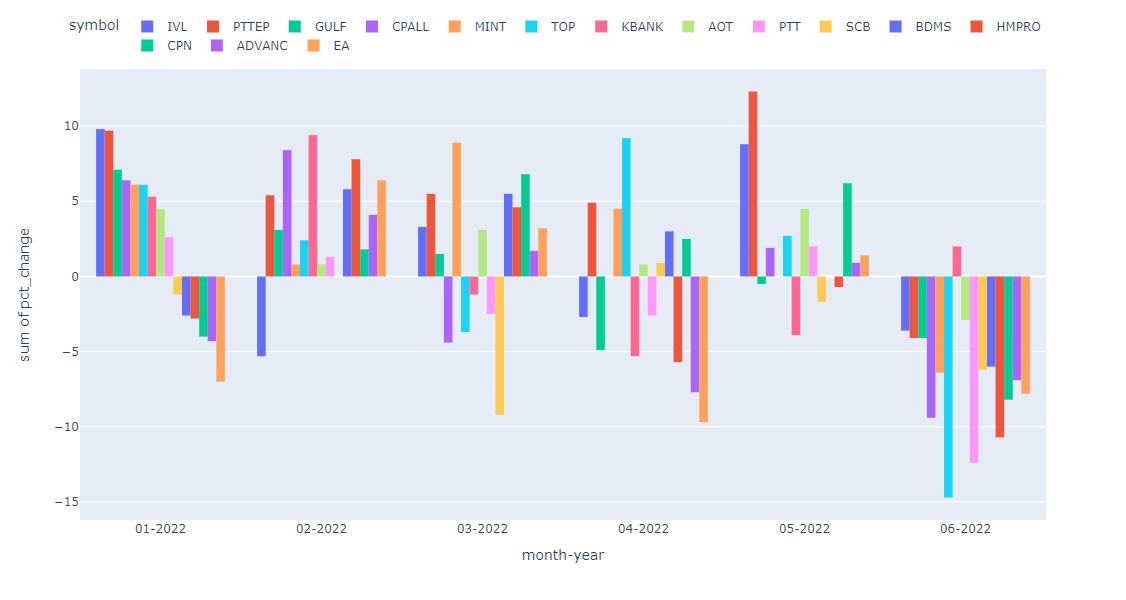

In [71]:
chart_title='pct_change'
fig = px.histogram(df_Monthly_Price, x="month-year", y="pct_change",
             color='symbol', barmode='group',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

# fig.update_layout(
#     autosize=True,
#     width=2000,
#     height=1000,)

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")


In [72]:
df_AllMonthly_Price=  df_Monthly_Price.groupby(["symbol"])[["pct_change"]].sum()
df_AllMonthly_Price.reset_index(drop=False,inplace=True)
df_AllMonthly_Price=df_AllMonthly_Price.sort_values(by="pct_change",ascending=False)
df_AllMonthly_Price.head()

,symbol,pct_change
12,PTTEP,33.7
10,MINT,13.9
1,AOT,10.8
8,IVL,10.3
9,KBANK,6.3


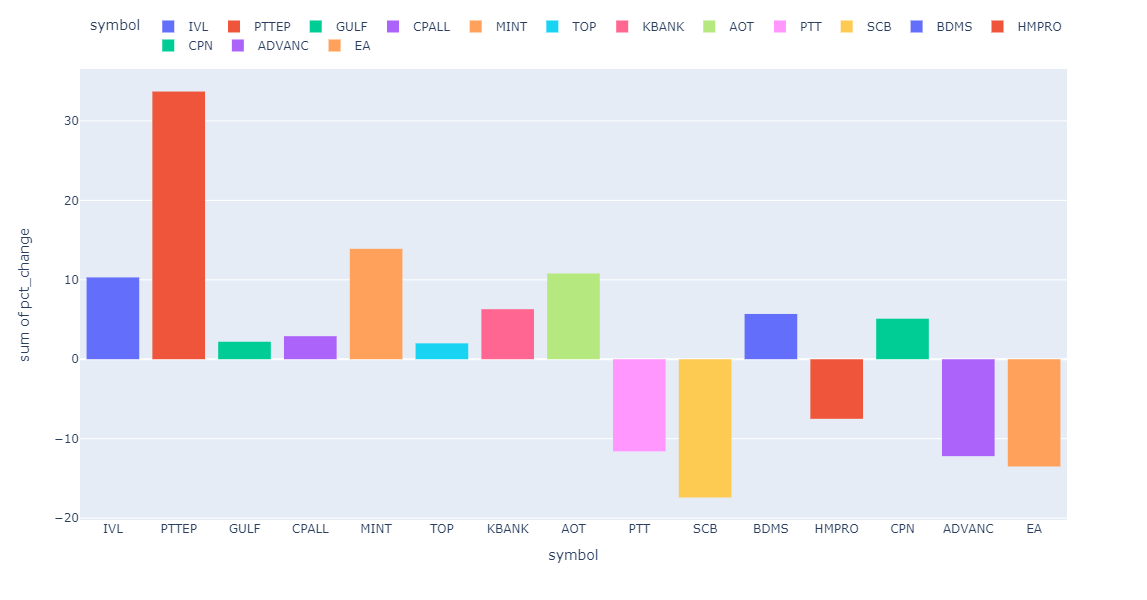

In [73]:
chart_title=f'pct_{from_month_str} - {to_month_str}'
fig = px.histogram(df_Monthly_Price, x="symbol", y="pct_change",
             color='symbol',height=600)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")

In [74]:
df_Monthly_Price['is-gain']=df_Monthly_Price.apply(lambda x: 1 if x['pct_change']>0 else 0 ,axis=1)
df_Monthly_Price.head()

,symbol,month-year,pct_change,is-gain
0,IVL,01-2022,9.8,1
1,PTTEP,01-2022,9.7,1
2,GULF,01-2022,7.1,1
3,CPALL,01-2022,6.4,1
4,MINT,01-2022,6.1,1


In [75]:
df_Monthly_Count=df_Monthly_Price.groupby(['month-year','is-gain'],as_index=False).size()
df_Monthly_Count.rename(columns={'size':'count'},inplace=True)
df_Monthly_Count.tail()

,month-year,is-gain,count
7,04-2022,1,7
8,05-2022,0,6
9,05-2022,1,9
10,06-2022,0,14
11,06-2022,1,1


In [76]:
if timeframe=='M':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%m-%Y')
elif timeframe=='W':
 df_Monthly_Count['month-year'] = pd.to_datetime(df_Monthly_Count['month-year'], format='%d-%m-%Y')   


df_Monthly_Count=df_Monthly_Count.sort_values(['month-year'])



if timeframe=='M':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%m-%Y') )
elif timeframe=='W':
 df_Monthly_Count['month-year']=df_Monthly_Count['month-year'].apply( lambda x: x.strftime('%d-%m-%Y') )  
df_Monthly_Count

,month-year,is-gain,count
0,01-2022,0,6
1,01-2022,1,9
2,02-2022,0,2
3,02-2022,1,13
4,03-2022,0,5
5,03-2022,1,10
6,04-2022,0,8
7,04-2022,1,7
8,05-2022,0,6
9,05-2022,1,9


In [77]:
df_Monthly_Count=df_Monthly_Count.reset_index(drop=True)
df_Monthly_Count.reset_index()
df_Monthly_Count

,month-year,is-gain,count
0,01-2022,0,6
1,01-2022,1,9
2,02-2022,0,2
3,02-2022,1,13
4,03-2022,0,5
5,03-2022,1,10
6,04-2022,0,8
7,04-2022,1,7
8,05-2022,0,6
9,05-2022,1,9


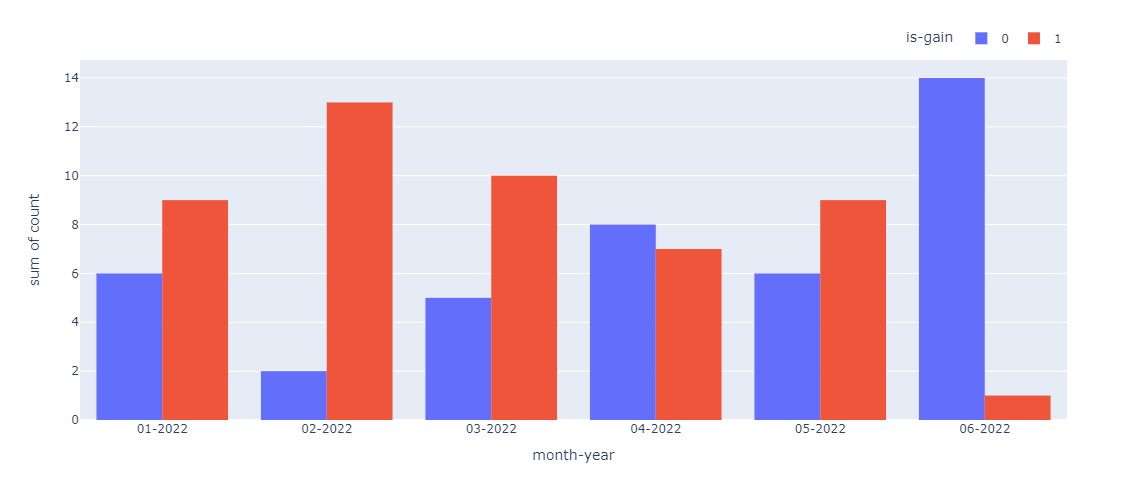

In [78]:
chart_title="gain-lose"

fig = px.histogram(df_Monthly_Count, x="month-year", y="count",
             color='is-gain', barmode='group',height=500)

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

pio.write_image(fig, f"{report_path}\\{title}-{chart_title}.png")

In [79]:
df_AllMonthly_Price['is-gain']=df_AllMonthly_Price.apply(lambda x: 1 if x['pct_change']>0 else 0 ,axis=1)
df_AllMonthly_Price

,symbol,pct_change,is-gain
12,PTTEP,33.7,1
10,MINT,13.9,1
1,AOT,10.8,1
8,IVL,10.3,1
9,KBANK,6.3,1
2,BDMS,5.7,1
4,CPN,5.1,1
3,CPALL,2.9,1
6,GULF,2.2,1
14,TOP,2.0,1


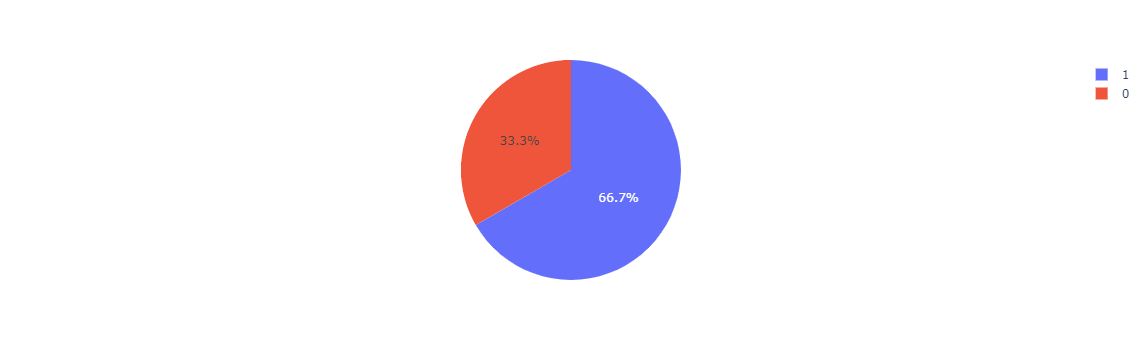

In [80]:
fig = px.pie(df_AllMonthly_Price,"is-gain")
fig.show()